# データ生成, 簡単な解析

データ生成と, データについて簡単な解析を行う. 解析として, 
* trainとtestのデータ数確認
* パターン数確認
* 

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import chainer
project_path = os.getcwd() + '/../../'
sys.path.append(project_path + "utils")
sys.path.append(project_path + "data")

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.externals import joblib
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

/Users/admin/Desktop/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# utils
import analysis
import function
import other
import local_bayes
import visualize

In [4]:
# data
from base import BaseDataManager
import get_normal_representation 
from preprocessing import Preprocessing
from data import Data

In [5]:
sys.path.append(project_path + "multi_models/cnn/")
sys.path.append(project_path + "models/cnn/")

# make

データ生成を行う.

In [6]:
## 注意: このデータロードはdataを入力とする場合, 関数ごとに毎回必要
# movielens = p.load_data('movielens.twd')
# science = p.load_data('science.twd')
# ajax = p.load_data('ajax.twd')
# java = p.load_data('java.twd')
# news = p.load_data('news.twd')
# css = p.load_data('css.twd')
# javascript = p.load_data('javascript.twd')
# opensource = p.load_data('opensource.twd')
# webdesign = p.load_data('webdesign.twd')
# design = p.load_data('design.twd')
# linux = p.load_data('linux.twd')
# photography = p.load_data('photography.twd')

# data_ls = [science, ajax, java, news, css, javascript, opensource, webdesign, design, linux, photography]
data_name_ls = ['science', 'ajax', 'java', 'news', 'css', 'javascript', 'opensource', 'webdesign', 'design', 'linux', 'photography']

In [7]:
data_name_ls[0]

'science'

In [8]:
# raw_data_dir = project_path + 'original_data/bookmark/'
# save_data_dir = project_path + 'data/datasets/bookmark_new/'
# train_test_ratio = 0.8
# stride = 5
# balance = True
# output_dim_ls = [6]

# base_data_manager = BaseDataManager(raw_data_dir, save_data_dir)
# D = Data(raw_data_dir, save_data_dir)
# P = Preprocessing(raw_data_dir, save_data_dir)

In [9]:
# for output_dim in output_dim_ls:
    
#     for data_name in data_name_ls:
#         print data_name
#         data = base_data_manager.load_data('%s.twd' % data_name)
#         ts_ls, ts_sum_ls = get_normal_representation.get_ts_normal_representation(data)
#         ts_dict = base_data_manager.div_train_test(ts_ls, train_test_ratio)
#         started_ts_dict = base_data_manager.get_started_ts(ts_dict)
#         input_ts_dict, label_dict, target_ts_dict, input_sum_dict = base_data_manager.make_supervised_data(started_ts_dict, output_dim, stride)
# #         if balance:
# #             input_ts_dict, label_dict, target_ts_dict = P.balancing_sampling(input_ts_dict, label_dict, target_ts_dict, output_dim)
#         data_type = 'balance'
#         D.make_train_data(input_ts_dict, label_dict, target_ts_dict, output_dim, data_type, data_name)

In [10]:
save_data_dir = '../../data/datasets/bookmark_new/normal/'
train_ajax = numpy.load(save_data_dir + 'ajax' + '/output_dim=6/train.npz')
test_ajax = numpy.load(save_data_dir + 'ajax' + '/output_dim=6/test.npz')
target_ajax = numpy.load(save_data_dir + 'ajax' + '/output_dim=6/target.npz')

In [11]:
len(train_ajax['y'])

9388

In [12]:
len(test_ajax['y'])

2503

In [13]:
label = numpy.r_[train_ajax['y'], test_ajax['y']]

In [14]:
label

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [15]:
type(label)

numpy.ndarray

In [16]:
ls = [0, 0, 1]

In [17]:
type(ls)

list

In [20]:
pattern = numpy.array([[1, 0, 0, 0, 0, 0], [0., 0., 0., 0., 0., 1.]])
ref = [0, 0]
for label_ele in label:
    for i, pattern_ele in enumerate(pattern):
        res = label_ele == pattern_ele
        if res.all():
            ref[i] += 1

In [21]:
ref

[582, 276]

In [40]:
sample = numpy.array([ 0.,  0.,  0.,  1.,  1.])

In [41]:
label[0]

array([ 0.,  0.,  0.,  1.,  1.])

In [42]:
res = sample == label[0]

In [43]:
res

array([ True,  True,  True,  True,  True], dtype=bool)

In [44]:
res.all()

True

In [56]:
if numpy.array([1, 2, 3, 4]) - numpy.array([1, 2, 2, 2]) == array([0, 0, 1, 2]):
    print 'a'

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
train_test_ratio = 0.8
balance = True
for output_dim in [1]:
    for data_name in data_name_ls:
        print data_name
        data = p.load_data('%s.twd' % data_name)
        category_ts, category_sum = p.timeseries(data)
        category_ts_dict = p.div_train_test(category_ts, train_test_ratio)
        category_started_ts_dict = p.make_started_ts(category_ts_dict)
        category_input_ts_dict, category_label_dict, category_target_ts_dict, category_input_sum_dict\
            = p.make_supervised_data(category_started_ts_dict, output_dim=output_dim, stride=5)
        if balance:
            category_input_ts_dict, category_label_dict, category_target_ts_dict = p.balancing_sampling(category_input_ts_dict, category_label_dict, category_target_ts_dict, output_dim)
        
        category_dir = '../../data/bookmark/%s/' % data_name
        save_data_dir = '../../data/bookmark/%s/page_shuffle/' % data_name
#         if output_dim == 1:
#             os.mkdir(category_dir)
#             os.mkdir(save_data_dir)
        p.make_test_dataset(category_input_ts_dict, category_label_dict, category_target_ts_dict, save_data_dir, output_dim)

science
0
0


OSError: [Errno 17] File exists: '../../data/bookmark/science/page_shuffle/output_dim=1/'

In [9]:
tra = category_label_dict['train']

NameError: name 'category_label_dict' is not defined

In [27]:
category_label_dict

{'test': array([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]), 'train': array([[ 1.,  1.,  0.],
        [ 1.,  1.,  1.],
        [ 0.,  1.,  1.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])}

In [28]:
tra.shape

(5385, 3)

In [29]:
tra_ele = tra[0]
tra = numpy.delete(tra, 0, axis=0)

In [30]:
len(tra[:10])

10

In [31]:
tra[:, 0][:30]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.])

In [32]:
category_input_ts_dict_, category_label_dict_, category_target_ts_dict_ = p.balancing_sampling(category_input_ts_dict, category_label_dict, category_target_ts_dict, output_dim)

0
1782
1040
0
200
103


In [33]:
category_input_ts_dict_

{'test': array([[ 0,  0,  0, ...,  0,  0,  1],
        [ 0,  0,  0, ...,  3,  2, 22],
        [ 5,  6,  6, ...,  1,  7,  1],
        ..., 
        [ 0,  0,  0, ...,  6,  5,  2],
        [10,  9, 11, ..., 20,  5,  3],
        [ 3,  9,  3, ...,  1,  2,  1]]),
 'train': array([[ 3,  4,  6, ...,  4,  1,  4],
        [ 3,  3,  3, ...,  5,  2,  6],
        [ 0,  0,  0, ..., 65, 74, 40],
        ..., 
        [ 1,  2,  3, ...,  3,  2,  1],
        [ 1,  3,  3, ...,  2,  2,  2],
        [ 0,  0,  0, ...,  0,  0,  0]])}

In [34]:
category_label_dict_ ['train'][:20]

array([[ 1.,  0.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

In [36]:
category_label_dict_['train'].shape

(730, 3)

In [38]:
category_target_ts_dict_['train'].shape

(730, 60)

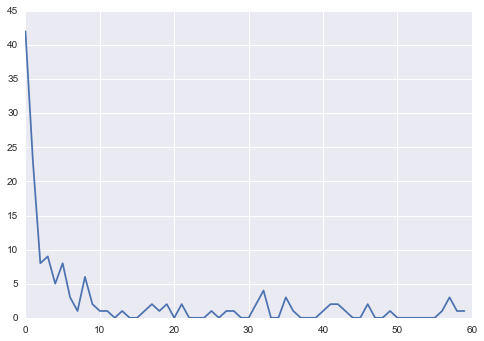

In [43]:
plt.plot(category_target_ts_dict_['train'][3])

# load

In [43]:
save_data_dir = '../../data/bookmark/'
train_ajax = numpy.load(save_data_dir + 'ajax' + '/balanced/output_dim=5/train.npz')
test_ajax = numpy.load(save_data_dir + 'ajax' + '/balanced/output_dim=5/test.npz')
target_ajax = numpy.load(save_data_dir + 'ajax' + '/balanced/output_dim=5/target.npz')

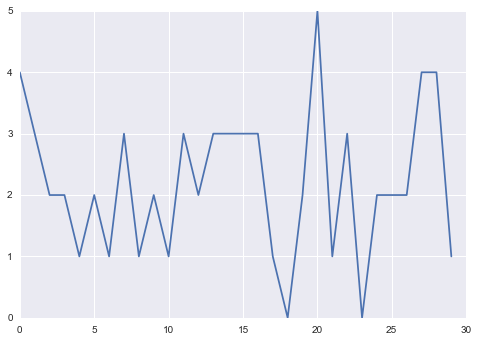

In [44]:
plt.plot(train_ajax['x'][0])

In [45]:
train_ajax['y'][:30]

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  1.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 1.,  

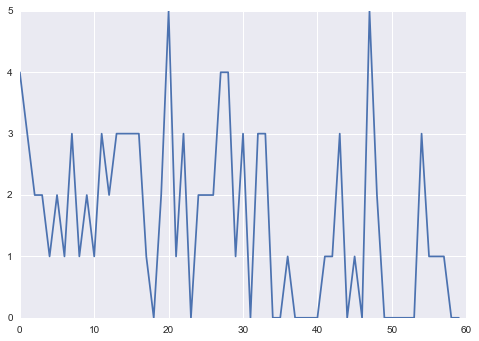

In [46]:
plt.plot(target_ajax['train'][0])

In [14]:
train_ajax['y'][1]

array([ 0.,  0.,  1.,  0.,  0.,  0.])

# model training

In [10]:
import cnn

In [11]:
# epoch_num = 50
# output_dim = 2
# save_data_dir = '../../data/bookmark/ajax/balanced/'
# save_model_dir = "../../results/balanced_multi/output_dim=%s/ajax_%s/" % (output_dim, epoch_num)
# other.mkdir_p(save_model_dir)
# train = numpy.load(save_data_dir + 'output_dim=%s/train.npz' % output_dim)
# test = numpy.load(save_data_dir + 'output_dim=%s/test.npz' % output_dim)
# cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [17]:
train['y'].squeeze()

array([ 0.,  1.,  1., ...,  0.,  0.,  1.])

In [27]:
epoch_num = 300
for output_dim in [1]:
    save_data_dir = '../../data/bookmark/ajax/balanced/'
    save_model_dir = "../../results/balanced/output_dim=%s/ajax_%s/" % (output_dim, epoch_num)
    other.mkdir_p(save_model_dir)
    train = numpy.load(save_data_dir + 'output_dim=%s/train.npz' % output_dim)
    test = numpy.load(save_data_dir + 'output_dim=%s/test.npz' % output_dim)
    cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)
    cnntrain.train(train, test)

epoch 1
graph generated
train mean loss=1.0531738009, accuracy=0.652774094159, throughput=936.922318187 images/sec
test  mean loss=0.769493758151, accuracy=0.683628326892
epoch 2
train mean loss=0.708698244904, accuracy=0.685426072208, throughput=993.286938368 images/sec
test  mean loss=0.625288003644, accuracy=0.694690269838
epoch 3
train mean loss=0.636639114634, accuracy=0.68993894477, throughput=962.082614818 images/sec
test  mean loss=0.598771461211, accuracy=0.710177004997
epoch 4
train mean loss=0.58589212721, accuracy=0.704273958911, throughput=934.070974279 images/sec
test  mean loss=0.580172024338, accuracy=0.704646020336
epoch 5
train mean loss=0.53981190234, accuracy=0.723387316348, throughput=1068.46788242 images/sec
test  mean loss=0.581792832608, accuracy=0.706858409717
epoch 6
train mean loss=0.535286246915, accuracy=0.730289354545, throughput=1097.85220897 images/sec
test  mean loss=0.573122834935, accuracy=0.704646022446
epoch 7
train mean loss=0.527132163313, accurac

In [33]:
accuracy = open('/Users/admin/Desktop/projects/attention_time/results/all/output_dim=1/ajax_300/accuracy.txt', 'r')
acc_ls = []
for i, line in enumerate(accuracy):
    if i != 0:
        acc_ls.append(float(line.split('\t')[1].rstrip()))

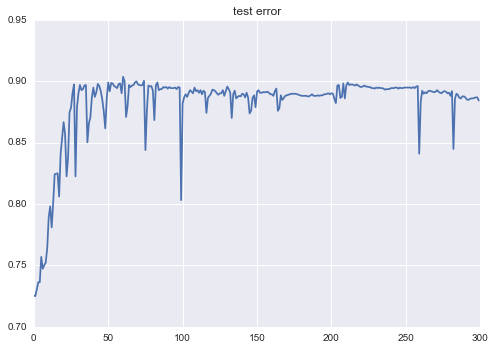

In [34]:
plt.title('test accuracy')
plt.plot(acc_ls)

In [30]:
accuracy = open('/Users/admin/Desktop/projects/attention_time/results/balanced/output_dim=1/ajax_300/accuracy.txt', 'r')
acc_ls = []
for i, line in enumerate(accuracy):
    if i != 0:
        acc_ls.append(float(line.split('\t')[1].rstrip()))

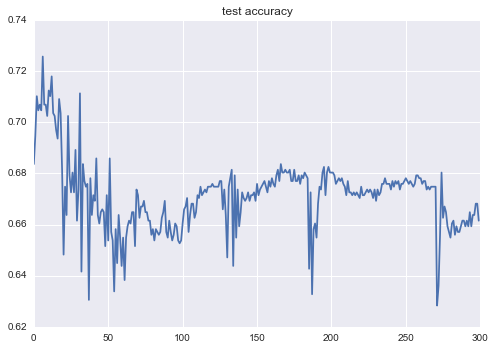

In [32]:
plt.title('test accuracy')
plt.plot(acc_ls)

In [67]:
test["y"].astype(numpy.int32)[:10]

array([[0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

In [62]:
import chainer.functions

In [63]:
t_ = chainer.functions.array.split_axis.split_axis(chainer.Variable(test["y"].astype(numpy.int32)), 2, 1)

In [64]:
chainer.Variable(t_[0].data.squeeze()).data

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [65]:
cnntrain.train(train, test, output_dim)

epoch 1
graph generated
train mean loss=0.521749988219, accuracy=[ 0.79888803  0.82337219], throughput=1005.20311902 images/sec
test  mean loss=0.43464985208, accuracy=[ 0.79669029  0.81678486]
epoch 2
train mean loss=0.422643821551, accuracy=[ 0.79888803  0.82337219], throughput=1054.85230354 images/sec
test  mean loss=0.422111227134, accuracy=[ 0.79669029  0.81678486]
epoch 3
train mean loss=0.408932572958, accuracy=[ 0.79888803  0.82337219], throughput=1113.08690132 images/sec
test  mean loss=0.409008013465, accuracy=[ 0.79669029  0.81678486]
epoch 4
train mean loss=0.405950754785, accuracy=[ 0.79888803  0.82337219], throughput=1058.31431915 images/sec
test  mean loss=0.405927830718, accuracy=[ 0.79669029  0.81678486]
epoch 5
train mean loss=0.399369446514, accuracy=[ 0.79888803  0.82337219], throughput=1064.73916284 images/sec
test  mean loss=0.415084924751, accuracy=[ 0.79669029  0.81678486]
epoch 6
train mean loss=0.395039249054, accuracy=[ 0.79888803  0.82337219], throughput=997

KeyboardInterrupt: 

In [28]:
epoch_num = 50
save_data_dir = '../data/bookmark/ajax_30/'
save_model_dir = "../models/cnn/results/ajax_%s_30/" % epoch_num
os.mkdir("../models/cnn/results/ajax_%s_30" % epoch_num)
train_0_0_30 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0_30 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

OSError: [Errno 2] No such file or directory: '../models/cnn/results/ajax_50_30'

In [57]:
train_0_0_30['x'].shape

(2168, 30)

In [58]:
cnntrain.train(train_0_0_30, test_0_0_30)

epoch 1
graph generated
train mean loss=0.856766545025, accuracy=0.749077491297, throughput=915.436561686 images/sec
test  mean loss=0.770515868255, accuracy=0.769372691967
epoch 2
train mean loss=0.513243945982, accuracy=0.783671582042, throughput=951.976112163 images/sec
test  mean loss=0.517006267701, accuracy=0.7822878176
epoch 3
train mean loss=0.412609556917, accuracy=0.818265679633, throughput=1027.25791076 images/sec
test  mean loss=0.451953402415, accuracy=0.789667895359
epoch 4
train mean loss=0.374739015839, accuracy=0.839022137032, throughput=1065.5489713 images/sec
test  mean loss=0.436411118925, accuracy=0.813653138291
epoch 5
train mean loss=0.350621334466, accuracy=0.845479698474, throughput=1073.68401146 images/sec
test  mean loss=0.52345504488, accuracy=0.789667890521
epoch 6
train mean loss=0.344226040468, accuracy=0.855166042038, throughput=1046.9965709 images/sec
test  mean loss=0.429894789449, accuracy=0.800738004301
epoch 7
train mean loss=0.33875343829, accuracy

In [59]:
epoch_num = 50
save_data_dir = '../data/bookmark/ajax_60/'
save_model_dir = "../models/cnn/results/ajax_%s_60/" % epoch_num
os.mkdir("../models/cnn/results/ajax_%s_60" % epoch_num)
train_0_0_60 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0_60 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [60]:
train_0_0_60['x'].shape

(1456, 30)

In [61]:
cnntrain.train(train_0_0_60, test_0_0_60)

epoch 1
graph generated
train mean loss=0.756237555234, accuracy=0.770604389505, throughput=414.482740029 images/sec
test  mean loss=0.714041425916, accuracy=0.834710748728
epoch 2
train mean loss=0.495513381518, accuracy=0.840659337139, throughput=712.392200358 images/sec
test  mean loss=0.427742324174, accuracy=0.867768587324
epoch 3
train mean loss=0.323671543909, accuracy=0.870879124563, throughput=818.748929825 images/sec
test  mean loss=0.292671098484, accuracy=0.895316805721
epoch 4
train mean loss=0.295001422024, accuracy=0.886675816889, throughput=917.035975479 images/sec
test  mean loss=0.380116275981, accuracy=0.887052334373
epoch 5
train mean loss=0.34921425846, accuracy=0.860576918901, throughput=952.15286567 images/sec
test  mean loss=0.473161475687, accuracy=0.878787879445
epoch 6
train mean loss=0.262986373893, accuracy=0.901098895122, throughput=911.876287539 images/sec
test  mean loss=0.245746021572, accuracy=0.925619831755
epoch 7
train mean loss=0.208810764692, accu